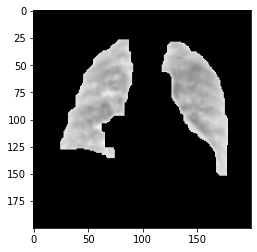

In [39]:
from skimage.io import imread
from matplotlib import pyplot as plt

root_dir = 'preprocessed/'
img_dir = 'masked_images/'
mask_dir = 'masks/'

idx = 1

features = {
    'area': [],
    'perimeter': [],
    'eccentricity': [],
    'major axis': [],
    'minor axis': [],
    'contrast': [],
    'homogeneity': [],
    'energy': [],
    'correlation': [],
    'entropy': []
}

img_loc = f'{root_dir}{img_dir}{idx}.png'
mask_loc = f'{root_dir}{mask_dir}{idx}.png'

img = imread(img_loc, as_gray=True)
mask = imread(mask_loc, as_gray=True)

plt.imshow(img, cmap=plt.cm.gray)

In [43]:
# shape based features
from skimage.measure import regionprops

prop = regionprops(mask)[0]

features['area'].append( prop['area'] )
features['perimeter'].append( prop['perimeter'] )
features['eccentricity'].append( prop['eccentricity'] )
features['major axis'].append( prop['major_axis_length'] )
features['minor axis'].append( prop['minor_axis_length'] )

features

{'area': [7882],
 'perimeter': [645.445742854949],
 'eccentricity': [0.8147324568685753],
 'major axis': [191.9759525266746],
 'minor axis': [111.31477315782965],
 'contrast': [185.41989949748745],
 'homogeneity': [0.8668683061927598],
 'energy': [0.7961718496746089],
 'correlation': [0.949106833962034],
 'entropy': []}

In [40]:
# glcm texture based features
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte

glcm = greycomatrix(img_as_ubyte(img), [1], [0], symmetric=True)

features['contrast'].append( greycoprops(glcm, prop='contrast')[0][0] )
features['homogeneity'].append( greycoprops(glcm, prop='homogeneity')[0][0] )
features['energy'].append( greycoprops(glcm, prop='energy')[0][0] )
features['correlation'].append( greycoprops(glcm, prop='correlation')[0][0] )

features

{'area': [],
 'perimeter': [],
 'eccentricity': [],
 'major axis': [],
 'minor axis': [],
 'contrast': [185.41989949748745],
 'homogeneity': [0.8668683061927598],
 'energy': [0.7961718496746089],
 'correlation': [0.949106833962034],
 'entropy': []}

In [44]:
#other texture based features
from skimage.measure import shannon_entropy
from skimage.measure import moments

# entropy
features['entropy'].append( shannon_entropy(img) )

# skewness, total mean, variance
# raw moments are NOT translation, rotation, and scale invariant (might change this later)
#moments(img)

# SD = square root of second moment


# skewness = third moment / SD^3

features

{'area': [7882],
 'perimeter': [645.445742854949],
 'eccentricity': [0.8147324568685753],
 'major axis': [191.9759525266746],
 'minor axis': [111.31477315782965],
 'contrast': [185.41989949748745],
 'homogeneity': [0.8668683061927598],
 'energy': [0.7961718496746089],
 'correlation': [0.949106833962034],
 'entropy': [1.8084645134496915]}

In [48]:
import pandas as pd

df = pd.DataFrame.from_dict(features)
df

,area,perimeter,eccentricity,major axis,minor axis,contrast,homogeneity,energy,correlation,entropy
0,7882,645.445743,0.814732,191.975953,111.314773,185.419899,0.866868,0.796172,0.949107,1.808465
